<a href="https://colab.research.google.com/github/geethaammu/DataScience/blob/main/Ds_Ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
action=pd.read_csv("/content/drive/MyDrive/action.csv")

In [ ]:
action.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN


In [ ]:
action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52452 entries, 0 to 52451
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     52452 non-null  object 
 1   movie_name   52452 non-null  object 
 2   year         44193 non-null  object 
 3   certificate  13668 non-null  object 
 4   runtime      32530 non-null  object 
 5   genre        52452 non-null  object 
 6   rating       29448 non-null  float64
 7   description  52452 non-null  object 
 8   director     47819 non-null  object 
 9   director_id  47819 non-null  object 
 10  star         43212 non-null  object 
 11  star_id      44621 non-null  object 
 12  votes        29450 non-null  float64
 13  gross(in $)  2760 non-null   float64
dtypes: float64(3), object(11)
memory usage: 5.6+ MB


In [ ]:
action.isnull().sum()

movie_id           0
movie_name         0
year            8259
certificate    38784
runtime        19922
genre              0
rating         23004
description        0
director        4633
director_id     4633
star            9240
star_id         7831
votes          23002
gross(in $)    49692
dtype: int64

In [ ]:
action=action.fillna(0)

In [ ]:
action.isnull().sum()

movie_id       0
movie_name     0
year           0
certificate    0
runtime        0
genre          0
rating         0
description    0
director       0
director_id    0
star           0
star_id        0
votes          0
gross(in $)    0
dtype: int64

In [ ]:
action["runtime"]=action["runtime"].str.replace("[,\ min]","").astype(float)

<ipython-input-11-e1a0c236f1e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  action["runtime"]=action["runtime"].str.replace("[,\ min]","").astype(float)


In [ ]:
action.sort_values(by=["gross(in $)"],ascending = False,inplace=True,ignore_index=True)

top_10=action.loc[0:9,"movie_name"]
top_10

0    Star Wars: Episode VII - The Force Awakens
1                             Avengers: Endgame
2                       Spider-Man: No Way Home
3                                        Avatar
4                                 Black Panther
5                        Avengers: Infinity War
6                                Jurassic World
7                                  The Avengers
8       Star Wars: Episode VIII - The Last Jedi
9                                 Incredibles 2
Name: movie_name, dtype: object

In [ ]:
content_r = action[action["certificate"]=='R']

popular =content_r.sort_values(by="rating",ascending=False,ignore_index=True)[0:10]
popular[0:5]

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt1890484,No Leaf Clover,2010,R,70.0,Action,8.8,A gangster owes money to the Mafia. He kidnaps...,Andrei Sporea,/name/nm4414819/,"Andrei Sporea, \nDelka Nenkova, \nLenny Porter...","/name/nm4414819/,/name/nm3384254/,/name/nm3629...",8.0,0.0
1,tt2604160,Broken Chains,2017,R,NaN,"Action, Adventure, Biography",8.7,Brianna married a man she thought would protec...,Shannon Brown,/name/nm4574737/,"Denise Reed, \nShannon Brown, \nMark Vincent, ...","/name/nm5163411/,/name/nm4574737/,/name/nm0898...",15.0,0.0
2,tt0133093,The Matrix,1999,R,136.0,"Action, Sci-Fi",8.7,When a beautiful stranger leads computer hacke...,"Lana Wachowski, \nLilly Wachowski",/name/nm0905154/,"Keanu Reeves, \nLaurence Fishburne, \nCarrie-A...","/name/nm0905152/,/name/nm0000206/,/name/nm0000...",1928021.0,171479930.0
3,tt1930512,The Empty Hands,2011,R,90.0,Action,8.6,A strong-willed black man motivated by the lov...,"Mahaliel Bethea, \nSteven Watkins",/name/nm1125293/,"Hermeilio Miguel Aquino, \nMahaliel Bethea, \n...","/name/nm4461088/,/name/nm2091134/,/name/nm1125...",12.0,0.0
4,tt0103064,Terminator 2: Judgment Day,1991,R,137.0,"Action, Sci-Fi",8.6,"A cyborg, identical to the one who failed to k...",James Cameron,/name/nm0000116/,"Arnold Schwarzenegger, \nLinda Hamilton, \nEdw...","/name/nm0000216/,/name/nm0000157/,/name/nm0000...",1107913.0,204843350.0


Text(0, 0.5, 'Movie Name')

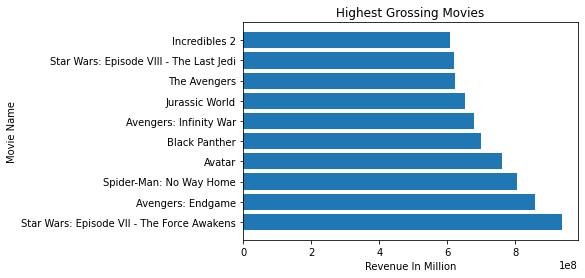

In [ ]:
plt.barh(action.loc[0:9,"movie_name"],action.loc[0:9,"gross(in $)"])
plt.title("Highest Grossing Movies")
plt.xlabel("Revenue In Million")
plt.ylabel("Movie Name")

Text(0, 0.5, 'Movie Name')

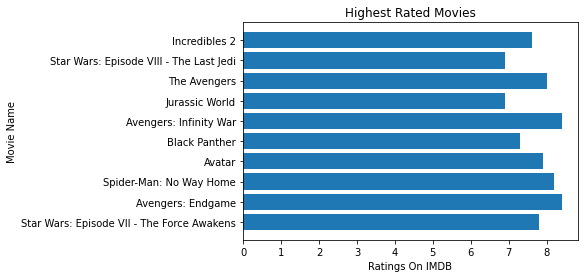

In [ ]:
action.sort_values(by=["gross(in $)"],ascending = False,inplace=True,ignore_index=True)

top_10=action.loc[0:9,"movie_name"]
top_10_rating=action.loc[0:9,"rating"]
plt.barh(action.loc[0:9,"movie_name"],action.loc[0:9,"rating"])
plt.title("Highest Rated Movies")
plt.xlabel("Ratings On IMDB")
plt.ylabel("Movie Name")

Text(0, 0.5, 'Movie Name')

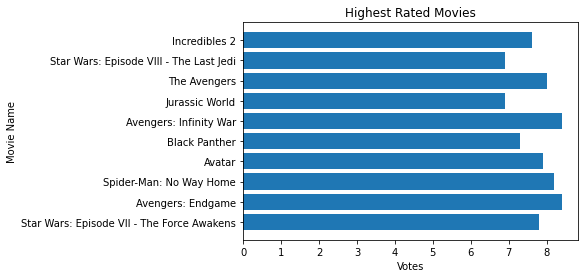

In [ ]:
action.sort_values(by=["gross(in $)"],ascending = False,inplace=True,ignore_index=True)

top_10=action.loc[0:9,"movie_name"]
top_10_rating=action.loc[0:9,"votes"]
plt.barh(action.loc[0:9,"movie_name"],action.loc[0:9,"rating"])
plt.title("Highest Rated Movies")
plt.xlabel("Votes")
plt.ylabel("Movie Name")

In [ ]:
result = action.sort_values(by='runtime', ascending=False,ignore_index=True)[0:10]
result[0:9]

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt7321476,h36:,2017,0,2160.0,Action,0.0,An attempt to bring the border between fiction...,Fabio Bastianello,/name/nm4176206/,"Loria Brambillasca, \nValdo Campos, \nFrancesc...","/name/nm9243852/,/name/nm9243855/,/name/nm9243...",0.0,0.0
1,tt0004052,The Hazards of Helen,1914,0,1428.0,Action,6.9,"Helen, informed of the danger which menaces an...","J. Gunnis Davis, \nJ.P. McGowan, \nRobert G. V...",/name/nm0204724/,"Helen Holmes, \nHelen Gibson, \nJ.P. McGowan, ...","/name/nm0569645/,/name/nm0897085/,/name/nm0391...",112.0,0.0
2,tt1483347,Cicak-Man 2: Planet Hitam,2008,0,999.0,"Action, Comedy, Sci-Fi",3.3,"The evil Professor Klon is back, not only to o...",Yusry Abd Halim,/name/nm1126474/,"Saiful Apek, \nFasha Sandha, \nAznil Hj Nawawi...","/name/nm1004978/,/name/nm1413294/,/name/nm2809...",150.0,0.0
3,tt3229648,Cicak-Man 3,2015,0,999.0,"Action, Comedy, Sci-Fi",3.7,Set after 7 years of the event of Cicakman 2: ...,"Ghaz Abu Bakar, \nYusry Abd Halim",/name/nm4323528/,"Zizan Razak, \nLisa Surihani, \nFizz Fairuz, \...","/name/nm1126474/,/name/nm3736757/,/name/nm3603...",149.0,0.0
4,tt0131597,Split,2004,Not Rated,700.0,"Action, Crime, Sci-Fi",5.2,Split is a joltingly visual techno thriller th...,Chaim Bianco,/name/nm0080719/,"Sean Miller, \nJonny Spanish, \nJulienne Hanze...","/name/nm1317822/,/name/nm0816839/,/name/nm0453...",24.0,0.0
5,tt1895288,A História de João e Zeca,2011,0,605.0,"Action, Crime",0.0,Add a Plot,"Paulo de Biasi, \nBruno Villela",/name/nm4420449/,Manoel Madeira,"/name/nm4420841/,/name/nm4420966/",0.0,0.0
6,tt0006206,Les vampires,1915,Not Rated,421.0,"Action, Adventure, Crime",7.3,An intrepid reporter and his loyal friend batt...,Louis Feuillade,/name/nm0275421/,"Musidora, \nÉdouard Mathé, \nMarcel Lévesque, ...","/name/nm0615736/,/name/nm0559013/,/name/nm0529...",5087.0,0.0
7,tt0009204,The House of Hate,1918,0,410.0,"Action, Drama",6.8,A young heiress of an American gun factory is ...,George B. Seitz,/name/nm0782707/,"Pearl White, \nAntonio Moreno, \nJohn Webb Dil...","/name/nm0925310/,/name/nm0603875/,/name/nm0227...",28.0,0.0
8,tt0007932,The Fatal Ring,1917,0,400.0,"Action, Drama",6.5,"Episode 1: ""The Violet Diamond"" Pearl Standish...",George B. Seitz,/name/nm0782707/,"Pearl White, \nEarle Foxe, \nWarner Oland, \nR...","/name/nm0925310/,/name/nm0289317/,/name/nm0645...",18.0,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


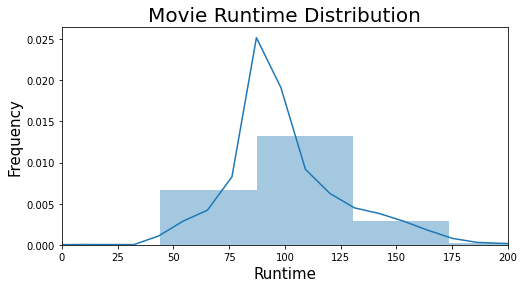

In [ ]:
plt.figure(figsize=[8,4])
run=sns.distplot(action["runtime"])
run.axes.set_title("Movie Runtime Distribution",fontsize=20)
run.set_xlabel("Runtime",fontsize=15)
run.set_ylabel("Frequency",fontsize=15)
run.axes.set_xlim(0, 200)
plt.show();

(0.0, 200.0)

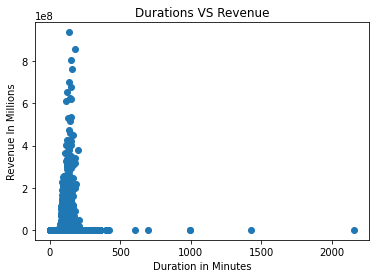

In [ ]:
plt.scatter(action["runtime"],action["gross(in $)"])
plt.title("Durations VS Revenue")
plt.xlabel("Duration in Minutes")
plt.ylabel("Revenue In Millions")
run.axes.set_xlim(0, 200)

Text(0.5, 0, 'Movie Rating')

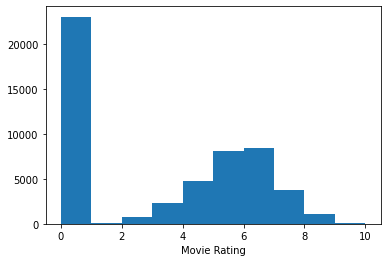

In [ ]:
plt.hist(action["rating"]); #as I converted the NaN values to 0 the count of 0 rating is high
plt.xlabel("Movie Rating")

Text(0, 0.5, 'Votes In Lakhs')

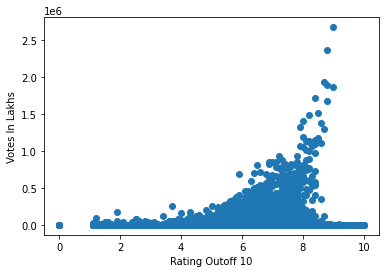

In [ ]:
plt.scatter(action["rating"],action["votes"])
plt.xlabel("Rating Outoff 10")
plt.ylabel("Votes In Lakhs")

In [ ]:
movies_by_year = action.groupby('year')['movie_id'].count().reset_index()
movies_by_year

,year,movie_id
0,0,8259
1,1906,1
2,1910,1
3,1911,1
4,1912,3
...,...,...
153,XXXI,1
154,XXXII,1
155,XXXIII,3
156,XXXIV,2


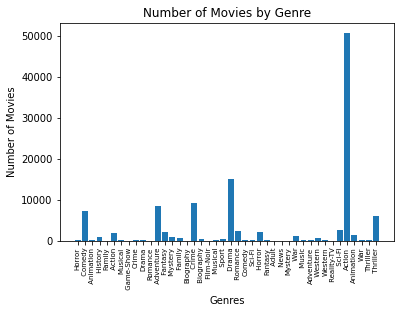

In [ ]:
all_genres = set()
for genres in action['genre']:
    for genre in genres.split(','):
        all_genres.add(genre)

# Count the number of movies in each genre
genre_counts = {}
for genre in all_genres:
    genre_counts[genre] = 0
for genres in action['genre']:
    for genre in genres.split(','):
        genre_counts[genre] += 1

# Create a bar chart
plt.bar(genre_counts.keys(), genre_counts.values())

# Add labels and title to the chart
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=90, fontsize=7)
plt.show()